In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [14]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [16]:
df = pd.read_csv("Salary_Data.csv")

In [17]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [18]:
df.shape    

(30, 2)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [20]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [21]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [22]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [23]:
df.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

In [24]:
df[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [25]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


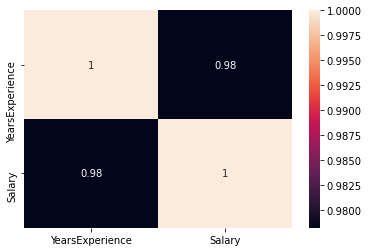

In [26]:
sns.heatmap(df.corr(),annot=True)
plt.show()

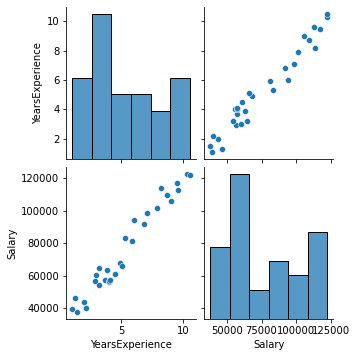

In [27]:
sns.pairplot(df)
plt.show()

In [28]:
X=df.drop('Salary',axis=1)

In [29]:
y=df.Salary

In [30]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [31]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

In [34]:
print(X_train.shape)

(21, 1)


In [35]:
X_test.shape

(9, 1)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
LR=LinearRegression()

In [38]:
LR.fit(X_train,y_train)

LinearRegression()

In [40]:
LR.intercept_

26777.391341197632

In [41]:
LR.coef_   

array([9360.26128619])

In [42]:
y_pred=LR.predict(X_test)

In [43]:
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [44]:
y_test

2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
27    112635
11     55794
17     83088
Name: Salary, dtype: int64

In [45]:
from sklearn import metrics

In [46]:
R2=metrics.r2_score(y_test,y_pred)

In [47]:
R2

0.9740993407213511

In [48]:
print(metrics.mean_absolute_error(y_test,y_pred))

3737.4178618788987


In [49]:
print(metrics.mean_squared_error(y_test,y_pred))

23370078.800832972


In [50]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4834.260936361728


In [51]:
print(LR.predict([[5]])) 

[73578.69777217]
